Let's define some conventions and physical equations of the De Saint Venaint theory on beams.

The convention we are gonna use for the signs consists in:

1. the displacement $u$ axis is positive pointing downwards
2. the rotation of the section $ \varphi $ is positive if counter-clockwise
3. the sheer force $T$ is positive if clockwise
4. the momentum $M$ is positive if it stretches the bottom part of the beam
5. the distributed load is positive if pointing downwards

NB: the plots are made to resemble the displacement in the reality while the momentums are placed on the side with the tensed fibers

We can then introduce two equations that revolve around the approximate linearity of the deformations in the DSV theory:

$$
    \dfrac{du}{dx}=-\varphi

    \qquad \text{and} \qquad

    \dfrac{d^2u}{dx^2}=\dfrac{-M}{EJ}
$$

We can also introduce some relations between those quantities that come from the balance on an infinitely small portion of the beam in the given conventions:

$$
    M'(x)=T(x)
    \qquad
    T'(x)=-q(x)
$$

We could solve by hand those differental equations to find the analytic formula of the displacement $u(x)$ but we can also implement a numerical method to find that distribution.

$$

\begin{cases}
    u' = u_2 \\
    u'' =-M(x) / E(x) J(x)\\
\end{cases}

\qquad \Rightarrow \qquad

\underline{du} =
\begin{bmatrix}
   u' \\
   u'' \\
\end{bmatrix}

\quad

\underline{u} =
\begin{bmatrix}
   u_1 = u = u(x)      \\
   u_2 = u' = -\varphi (x) \\
\end{bmatrix}

$$

To do that we have to solve a system of differential equation given some boundary condition, which depend on the constraints at the ending points of the beam:

1. a fixed constrain imposes $u=0$ and $\varphi=0$
2. a joint imposes $u=0$ and $M=0$
3. a loose end imposes $T=0$ and $M=0$
4. a skate imposes $\varphi =0$ and $T=0$

In [1]:
using Plots
using DifferentialEquations
using BoundaryValueDiffEq

Solving Poisson where M, E and J are functions of x and the beam is fixed on the left side

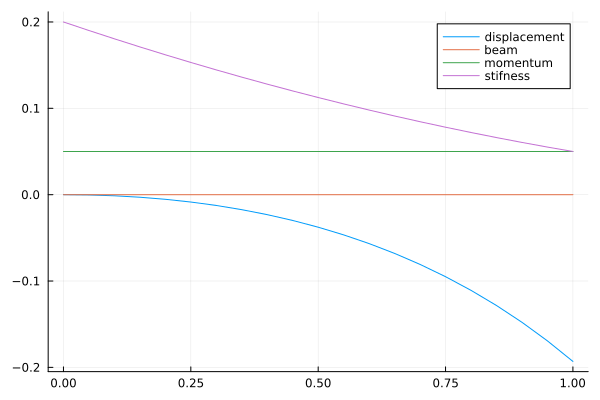

In [2]:
E(x)= 2-x                   #young module equation
J(x)= 2-x                   #inertia equation
M(x)=-1;                    #momentum equation

EJ(x)= E(x)*J(x)

f(x)=-M(x)/(EJ(x))          #poisson equation


function poisson!(du,u,p,x)
    du[1]=u[2]
    du[2]=f(x)
end


function bc!(r,u,p,x)       #boundary condition of the fixed costrain
    r[1]= u[1][1] - 0  
    r[2]= u[1][2] - 0
end


xspan=(0.0 , 1.0)

bvp= BVProblem(poisson!,bc!,[0.,0.],xspan)

u_sol= solve(bvp,MIRK4(), dt = 0.05)

plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,-0.05*M.(u_sol.t),label="momentum")

plot!(u_sol.t,0.05*(EJ.(u_sol.t)),label="stifness")

We can also find the displacement starting from the distributed load $q(x)$. Let's study the case when E and J are constant along x:

$$
    
$$

beam equation with E and J constant and q as a function of x between two joints

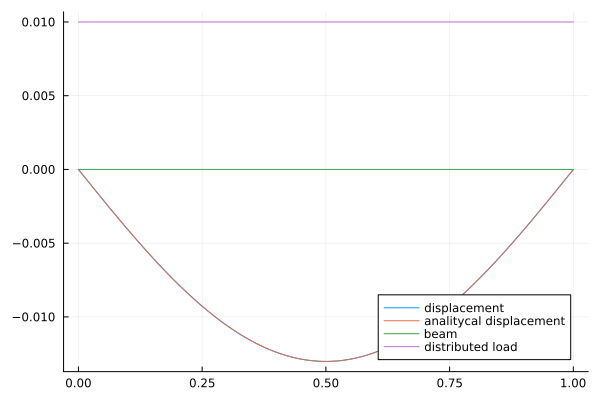

In [3]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][1]
    residual[3]= u[1][3] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")

fex(x)=(x^4/24 -x^3/12 +x/24)*f(x)                              #exact analitycal solution 
plot!(u_sol.t,-fex.(u_sol.t),label="analitycal displacement")

plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")



case with fixed joint in one end

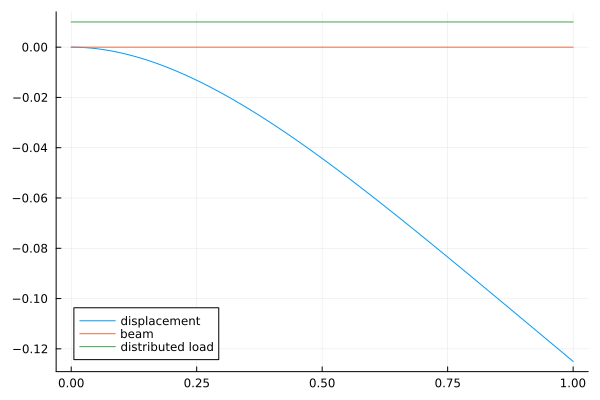

In [4]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][3]
    residual[3]= u[1][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

we can also model an impulse momentum in the end point by putting it in the beoundary conditions 

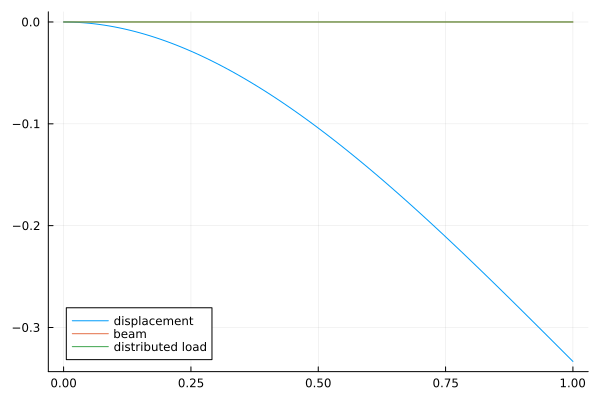

In [5]:
q(x)=0
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][3]
    residual[3]= u[1][2] 
    residual[4]= u[end][4] + 1
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed constrain and joint 

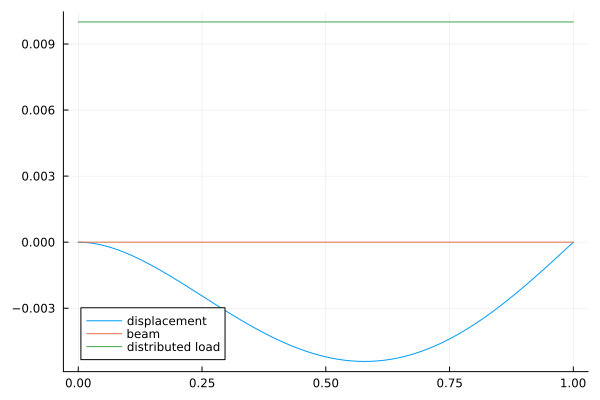

In [6]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][1] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed costrain and skate

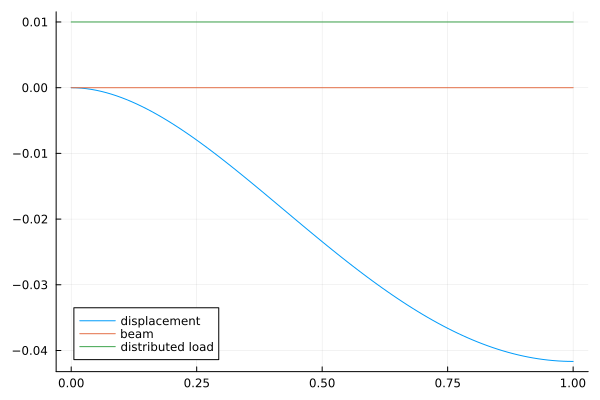

In [7]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between two fixed joints

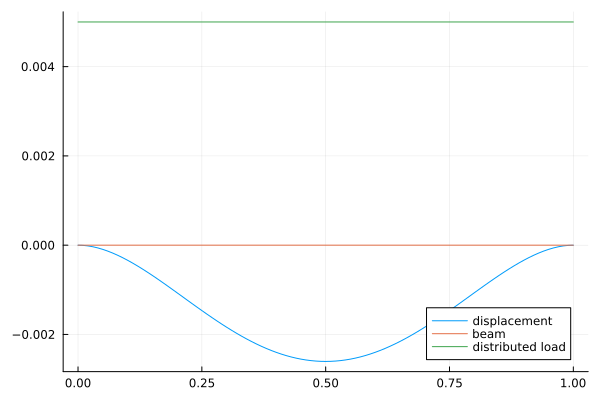

In [8]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][1] 
    residual[4]= u[end][2] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.005*f.(u_sol.t),label="distributed load")

let's try using a gaussian distribution for the load between a fixed contrain and a skate

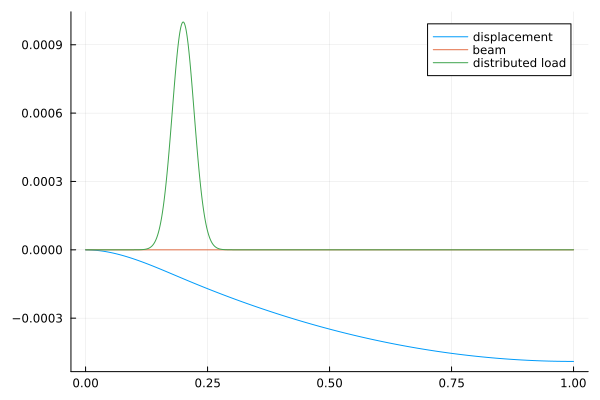

In [9]:
A=1
x0=0.2
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))

E(x)= 1               #young module equation (HAS TO BE CONSTANT)
J(x)= 1                     #inertia equation (HAS TO BE CONSTANT)
EJ(x)= E(x)*J(x)        #stiffness (HAS TO BE CONSTANT)


f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.001)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.001*q.(u_sol.t),label="distributed load")

We can now try to vary E an J by implementing the variation on E and J along x. 

We have to consider a new beam equation that now accounts for these changes starting from the Poisson equation, which isn't influenced by those variations:

$$

u''\cdot E(x)J(x) = -M(x) 

\quad \rightarrow \quad

\left( u''\cdot E(x)J(x) \right)'= \left( -M(x)\right)' = -T(x)

\quad \rightarrow \quad

\left( u''\cdot E(x)J(x) \right)''= \left( -T(x)\right)' = q(x)

$$

In this way e get a new form of the beam equation that accounts for the variability of the stiffness:

$$ \dfrac{d^2}{dx^2} \left[ \dfrac{d^2u}{dx^2} \cdot E(x)J(x) \right] = q(x) $$

So now to solve the differential equation we can divide it in two differential equations and solve the system:

$$

\begin{cases}
    u'' \cdot E(x) J(x) =v \\
    v''=q(x)
\end{cases}

\qquad \Rightarrow \qquad

\begin{cases}
    u' = u_2 \\
    u'' =v / E(x) J(x)\\
    v'=u_4 \\
    v''=q(x)
\end{cases}

\qquad \Rightarrow \qquad

\underline{du} =
\begin{bmatrix}
   u' \\
   u'' \\
   v' \\
   v'' \\
\end{bmatrix}

\quad

\underline{u} =
\begin{bmatrix}
   u_1 = u = u(x)      \\
   u_2 = u' = -\varphi (x) \\
   u_3 = v = -M(x)     \\
   u_4 = v' = -T(x)    \\
\end{bmatrix}

$$

We can now impose the boundary conditions on the components of the $ \underline{u}$ vector according to the constrains

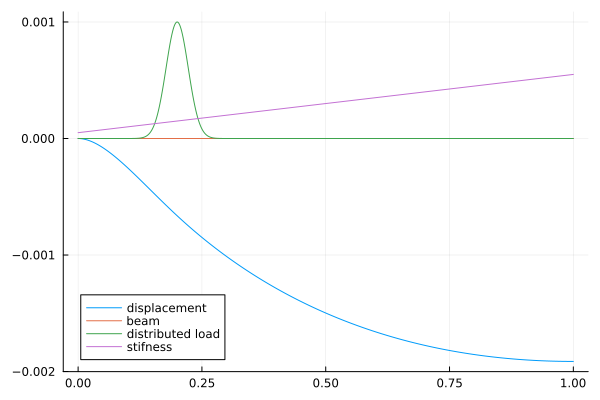

In [10]:
A=1
x0=0.2
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))

E(x)= 1           #young module equation
J(x)= x +0.1                     #inertia equation
EJ(x)= E(x)*J(x)        #stiffness

f(x)=q(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/EJ(x)
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.001)




plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.001*q.(u_sol.t),label="distributed load")
plot!(u_sol.t,0.0005*(EJ.(u_sol.t)),label="stifness")

We can also then see the influence of an instant variation in the stiffness, for example due to a change in material or a support being attached to the beam

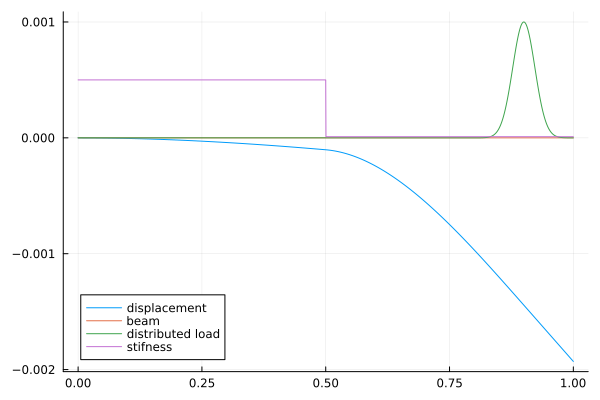

In [11]:
A=1
x0=0.9
x1=0.5                      #change of stiffness
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))


function J(x,x1)            #inertia equation
    if x<=x1
        50
    else
        1
    end
end               
E(x)= 1                     #young module equation
EJ(x,x1)= J(x,x1)*E(x)        #stiffness

f(x)=q(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/EJ(x,x1)
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][3] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.001)




plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.001*q.(u_sol.t),label="distributed load")
plot!(u_sol.t,0.00001*(EJ.(u_sol.t,x1)),label="stifness")

Now let's try to split the beam in two different beams linked by a fixed constrain, then we are going to apply a gaussian load only on the end of the second one.

We will be able to manipulate the transfer of internal actions in the costrain via the boundary conditions

-11.725711687094542

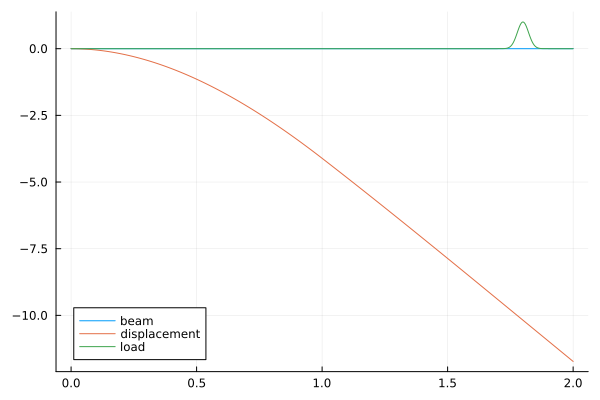

In [12]:
A=100
x0=0.8
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))


E(x)= 10              #young module equation
J(x)= 1                     #inertia equation
EJ(x)= E(x)*J(x)        #stiffness

q1(x)=0
q2(x)=q(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/1
    du[3]=u[4]
    du[4]=q1(x)

    du[4+1]=u[4+2]
    du[4+2]=u[4+3]/4
    du[4+3]=u[4+4]
    du[4+4]=q2(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
   
    residual[3]= u[end][1] - u[1][4+1]
    residual[4]= u[end][2] - u[1][4+2]
    residual[5]= u[end][3] - u[1][4+3]
    residual[6]= u[end][4] - u[1][4+4]

    residual[7]= u[end][4+3]
    residual[8]= u[end][4+4]
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.,0.,0.,0.,0.],xspan)
u_sol= solve(bvp,MIRK4(),dt = 0.001)

x_dis1=u_sol.t
x_dis2=u_sol.t .+ 1

x_dis= vcat(x_dis1,x_dis2)

u_dis1= -u_sol[1,:]
u_dis2= -u_sol[4+1,:]

u_dis= vcat(u_dis1,u_dis2)

display(u_dis[end])


plot(x_dis,0*x_dis,label="beam")

plot!(x_dis,u_dis,label="displacement")

q1_dis=q1.(u_sol.t)
q2_dis=q2.(u_sol.t)

q_dis=0.01*vcat(q1_dis,q2_dis)

plot!(x_dis,q_dis,label="load")






let's also try to add a support beam in the middle of the axis and we will see how the maximum diplacement reduces significantly

-0.5823395959023089

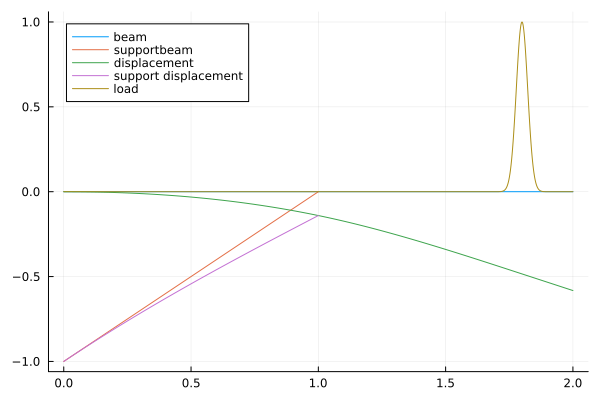

In [13]:
A=100
x0=0.8
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))


E(x)= 10              #young module equation
J(x)= 1                     #inertia equation
EJ(x)= E(x)*J(x)        #stiffness

q1(x)=0
q2(x)= q(x)
q3(x)=0
T2 = 0


alpha=pi/4
y03=tan(alpha)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/EJ(x)
    du[3]=u[4]
    du[4]=q1(x)

    du[4+1]=u[4+2]
    du[4+2]=u[4+3]/EJ(x)
    du[4+3]=u[4+4]
    du[4+4]=q2(x)

    du[8+1]=u[8+2]
    du[8+2]=u[8+3]/EJ(x)
    du[8+3]=u[8+4]
    du[8+4]=q3(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]                    # displacement start beam 1 = 0
    residual[2]= u[1][2]                    # angle start beam 1 = 0

    residual[3]= u[end][1] - u[1][4+1]      # u end beam 1 = u start beam 2
    residual[4]= u[end][2] - u[1][4+2]      # phi end beam 1 = phi start beam 2
    
    residual[5]= -u[1][4+3] + u[end][8+3] + u[end][3]               # sum of the momentums in the node
    residual[6]= -u[1][4+4] + u[end][8+4]/cos(alpha) + u[end][4]    # sum of the sheer in the node
    
    residual[7]= u[end][4+3]                            # momentum end beam 2 = 0
    residual[8]= u[end][4+4] + T2                       # sheer end beam 2 = T2 (NB: v'=-T)

    residual[9]= u[1][8+1]                              # u start beam 3 = 0
    residual[10]= u[1][8+2]                             # phi start beam 3 = 0
    
    residual[11]= u[end][8+1]*cos(alpha) - u[end][1]    # u end beam 3 = u end beam 1
    residual[12]= u[end][2] - u[end][8+2]               # phi end 1 = phi end 3
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],xspan)
u_sol= solve(bvp,MIRK4(),dt = 0.001)

x_dis1=u_sol.t
x_dis2=u_sol.t .+ 1
x_dis= vcat(x_dis1,x_dis2)

u_dis1= -u_sol[1,:]
u_dis2= -u_sol[4+1,:]
u_dis= vcat(u_dis1,u_dis2)

x_dis3= x_dis1
b_dis3= -y03 .+ tan(alpha).*x_dis3
u_dis3= b_dis3 .- u_sol[8+1,:]*cos(alpha)

display(u_dis[end])

plot(x_dis,0*x_dis,label="beam")
plot!(x_dis3,b_dis3,label="supportbeam")

plot!(x_dis,u_dis,label="displacement")
plot!(x_dis3,u_dis3,label="support displacement")

q1_dis=q1.(u_sol.t)
q2_dis=q2.(u_sol.t)

q_dis=0.01*vcat(q1_dis,q2_dis,T2)
xq_dis=vcat(x_dis,x_dis[end])

plot!(xq_dis,q_dis,label="load")


we can also plot the values of the internal reactions for beam 1 and 2 to see if the conditions in the node are respected

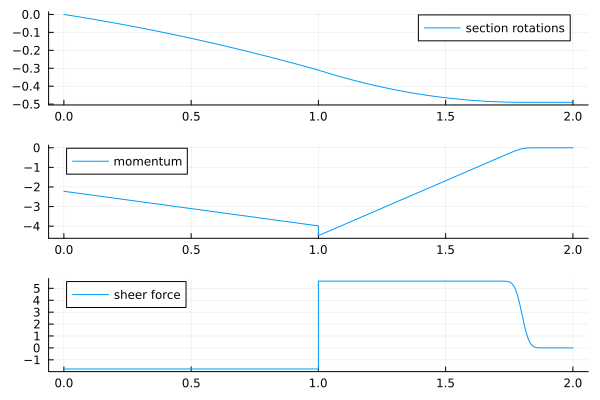

In [14]:
phi_dis1= -u_sol[2,:]
phi_dis2= -u_sol[4+2,:]
phi_dis= vcat(phi_dis1,phi_dis2)

plot_phi= plot(x_dis,phi_dis,label="section rotations")

M_dis1= -u_sol[3,:]
M_dis2= -u_sol[4+3,:]
M_dis= vcat(M_dis1,M_dis2)

plot_M= plot(x_dis,M_dis,label="momentum")

T_dis1= -u_sol[4,:]
T_dis2= -u_sol[4+4,:]
T_dis= vcat(T_dis1,T_dis2)

plot_T= plot(x_dis,T_dis,label="sheer force")

plot(plot_phi , plot_M , plot_T , layout=(3,1))

we can also apply and impulse force on the ending point of beam 2

-0.12667397593597496

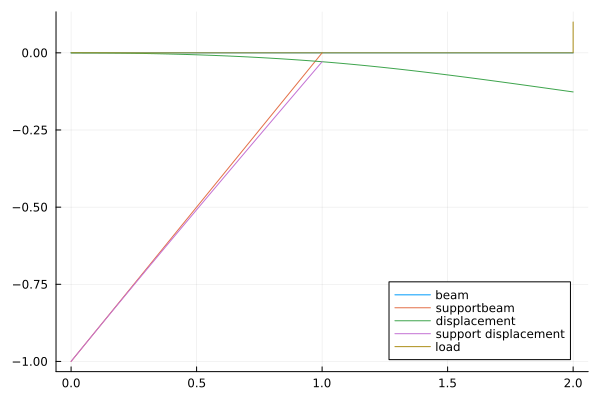

In [15]:
A=10
x0=0.8
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))


E(x)= 10              #young module equation
J(x)= 1                     #inertia equation
EJ(x)= E(x)*J(x)        #stiffness

q1(x)=0
q2(x)= 0
q3(x)=0
T2 = 1


alpha=pi/4
y03=tan(alpha)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/EJ(x)
    du[3]=u[4]
    du[4]=q1(x)

    du[4+1]=u[4+2]
    du[4+2]=u[4+3]/EJ(x)
    du[4+3]=u[4+4]
    du[4+4]=q2(x)

    du[8+1]=u[8+2]
    du[8+2]=u[8+3]/EJ(x)
    du[8+3]=u[8+4]
    du[8+4]=q3(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]                    # displacement start beam 1 = 0
    residual[2]= u[1][2]                    # angle start beam 1 = 0

    residual[3]= u[end][1] - u[1][4+1]      # u end beam 1 = u start beam 2
    residual[4]= u[end][2] - u[1][4+2]      # phi end beam 1 = phi start beam 2
    
    residual[5]= -u[1][4+3] + u[end][8+3] + u[end][3]               # sum of the momentums in the node
    residual[6]= -u[1][4+4] + u[end][8+4]/cos(alpha) + u[end][4]    # sum of the sheer in the node
    
    residual[7]= u[end][4+3]                            # momentum end beam 2 = 0
    residual[8]= u[end][4+4] + T2                       # sheer end beam 2 = T2 (NB: v'=-T)

    residual[9]= u[1][8+1]                              # u start beam 3 = 0
    residual[10]= u[1][8+2]                             # phi start beam 3 = 0
    
    residual[11]= u[end][8+1]*cos(alpha) - u[end][1]    # u end beam 3 = u end beam 1
    residual[12]= u[end][2] - u[end][8+2]               # phi end 1 = phi end 3
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],xspan)
u_sol= solve(bvp,MIRK4(),dt = 0.001)

x_dis1=u_sol.t
x_dis2=u_sol.t .+ 1
x_dis= vcat(x_dis1,x_dis2)

u_dis1= -u_sol[1,:]
u_dis2= -u_sol[4+1,:]
u_dis= vcat(u_dis1,u_dis2)

x_dis3= x_dis1
b_dis3= -y03 .+ tan(alpha).*x_dis3
u_dis3= b_dis3 .- u_sol[8+1,:]*cos(alpha)

display(u_dis[end])

plot(x_dis,0*x_dis,label="beam")
plot!(x_dis3,b_dis3,label="supportbeam")

plot!(x_dis,u_dis,label="displacement")
plot!(x_dis3,u_dis3,label="support displacement")

q1_dis=q1.(u_sol.t)
q2_dis=q2.(u_sol.t)

q_dis=0.1*vcat(q1_dis,q2_dis,T2)
xq_dis=vcat(x_dis,x_dis[end])

plot!(xq_dis,q_dis,label="load")




we can also plot the values of the internal reactions for beam 1 and 2 to see if the conditions in the node are respected

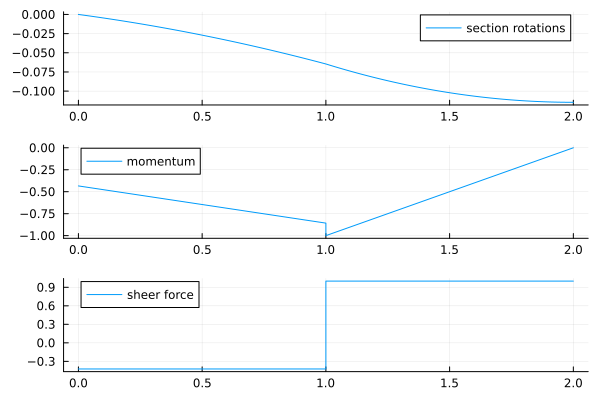

In [16]:
phi_dis1= -u_sol[2,:]
phi_dis2= -u_sol[4+2,:]
phi_dis= vcat(phi_dis1,phi_dis2)

plot_phi= plot(x_dis,phi_dis,label="section rotations")

M_dis1= -u_sol[3,:]
M_dis2= -u_sol[4+3,:]
M_dis= vcat(M_dis1,M_dis2)

plot_M= plot(x_dis,M_dis,label="momentum")

T_dis1= -u_sol[4,:]
T_dis2= -u_sol[4+4,:]
T_dis= vcat(T_dis1,T_dis2)

plot_T= plot(x_dis,T_dis,label="sheer force")

plot(plot_phi , plot_M , plot_T , layout=(3,1))